In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'social media influencers - Tiktok sep 2022.csv'
df = pd.read_csv(file_path)
df.head(5)

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
1,2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
2,3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
3,4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
4,5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K


In [5]:
# Definir una función para convertir K y M.

def convertir(valor):
    if 'K' in valor:
        return float(valor.replace('K', '')) * 1e3
    elif 'M' in valor:
        return float(valor.replace('M', '')) * 1e6
    else:
        return float(valor)

# Aplicar la función a la columna 'Subscribers'
df['Subscribers'] = df['Subscribers'].apply(convertir)
    
# Aplicar la función a la columna 'Views avg.'
df['Views avg.'] = df['Views avg.'].apply(convertir)

# Aplicar la función a la columna 'Likes avg.'
df['Likes avg.'] = df['Likes avg.'].apply(convertir)
    
# Aplicar la función a la columna 'Comments avg.'
df['Comments avg.'] = df['Comments avg.'].apply(convertir)
    
# Aplicar la función a la columna 'Shares avg.'
df['Shares avg.'] = df['Shares avg.'].apply(convertir)

df.head(5)

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13800000.0,6400000.0,2300000.0,50200.0,34200.0
1,2,khaby.lame,Khabane lame,149200000.0,17300000.0,2300000.0,15200.0,8700.0
2,3,scarlettsspam2,scarlett,2100000.0,17900000.0,845800.0,53900.0,6300.0
3,4,addisonre,Addison Rae,88700000.0,22000000.0,906600.0,7600.0,26200.0
4,5,belindatok,Belinda,4800000.0,14200000.0,1500000.0,14500.0,15300.0


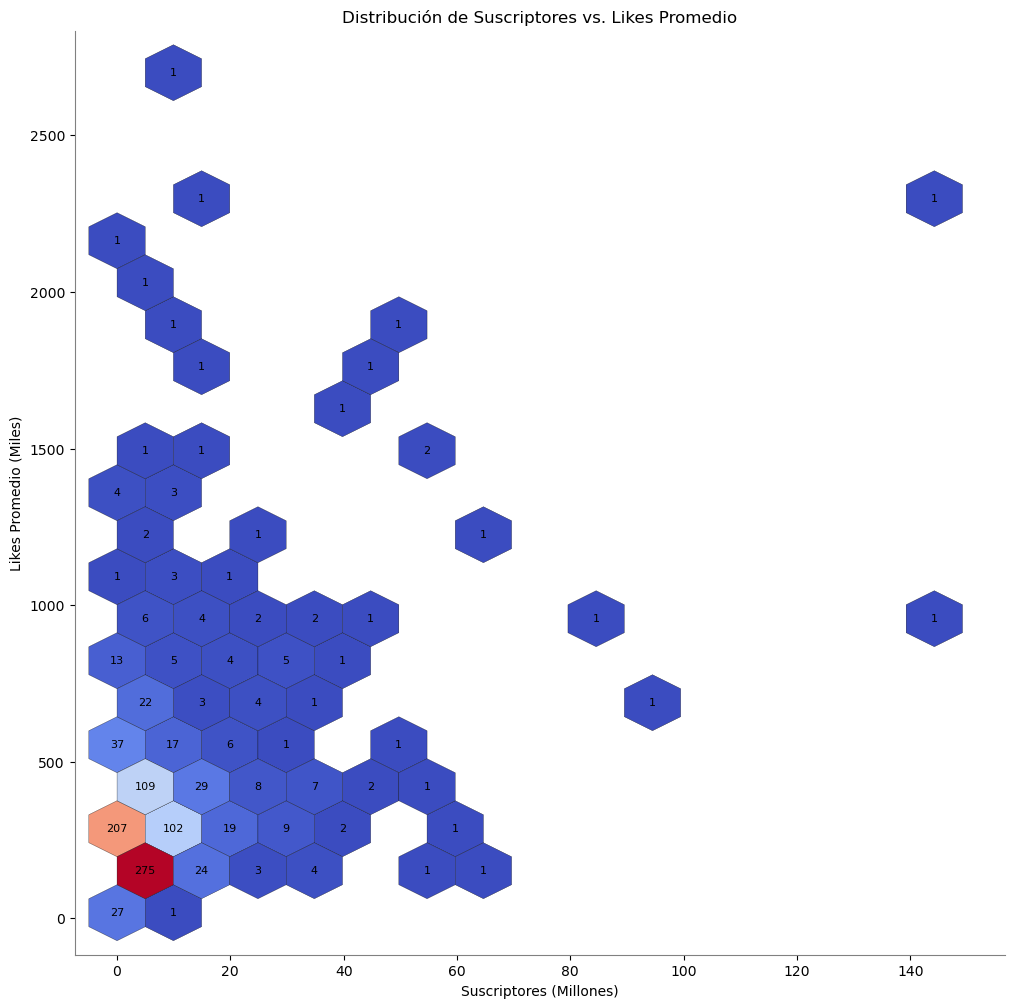

In [8]:
# Crear gráfico Hexagon Binning

# Número de Publicaciones y Likes
x_subscribers = df['Subscribers']/1e6
y_likes = df['Likes avg.']/1e3

plt.figure(figsize=(12, 12))
hexbin = plt.hexbin(x_subscribers, y_likes, gridsize=(15, 10), cmap='coolwarm', mincnt=1, edgecolors='black', linewidths=0.2)

# Agregar etiquetas con el número en cada hexágono
for i in range(len(hexbin.get_array())):
    count = hexbin.get_array()[i]
    if count > 0:
        x, y = hexbin.get_offsets()[i]
        plt.annotate(int(count), (x, y), ha='center', va='center', fontsize=8, color='black')

plt.xlabel('Suscriptores (Millones)')
plt.ylabel('Likes Promedio (Miles)')
plt.title('Distribución de Suscriptores vs. Likes Promedio')

# Configurar el color del borde del área de trazado a blanco
for spine in plt.gca().spines.values():
    spine.set_edgecolor('grey')
    
    
# Mostrar solo las líneas de los ejes sin cerrar el cuadrado
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('hexbin_plot.png', bbox_inches='tight')
plt.show()